In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [19]:
df=pd.read_csv("heartatack.csv")
df.head()


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [20]:
df.shape

(303, 14)

In [21]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [23]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

# Split Data

In [24]:
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2020)
print('Shape of X_train = ', x_train.shape)
print('Shape of y_train = ', y_train.shape)
print('Shape of X_test = ', x_test.shape)
print('Shape of y_test = ', y_test.shape)

Shape of X_train =  (242, 13)
Shape of y_train =  (242,)
Shape of X_test =  (61, 13)
Shape of y_test =  (61,)


# K Nearest Neightors Classification 

In [26]:
from sklearn.neighbors import KNeighborsClassifier


In [27]:
Classifier= KNeighborsClassifier(n_neighbors=5)
Classifier.fit(x_train,y_train)


KNeighborsClassifier()

In [28]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(x_train)


StandardScaler()

In [29]:
Classifier.score(x_test,y_test)


0.7213114754098361

In [30]:
y_pred=Classifier.predict(x_test)
Classifier.predict(x_test)


array([0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0], dtype=int64)

In [31]:
y_test.head()


292    0
283    0
208    0
34     1
163    1
Name: output, dtype: int64

# Support vector machine classification

In [32]:
from sklearn.svm import SVC


In [33]:
classification_rbf=SVC(kernel='rbf')
classification_rbf.fit(x_train,y_train)


SVC()

In [34]:
classification_rbf.score(x_test,y_test)


0.6721311475409836

# Feature scaling


In [35]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()


In [36]:
sc.fit(x_train)


StandardScaler()

In [37]:
x_train_sc=sc.transform(x_train)
x_test_sc=sc.transform(x_test)


In [38]:
classification_rbf_2=SVC(kernel='rbf')
classification_rbf_2.fit(x_train_sc,y_train)
classification_rbf_2.score(x_test_sc,y_test)


0.7868852459016393

# Tune Parameter


In [39]:
model_c=SVC(C=5)
model_c.fit(x_train,y_train)
model_c.score(x_test,y_test)


0.7049180327868853

In [40]:
model_g=SVC(gamma=5)
model_g.fit(x_train,y_train)
model_g.score(x_test,y_test)


0.5737704918032787

# SVC with kernal polynomial


In [41]:
classification_poly=SVC(kernel='poly',degree=2)
classification_poly.fit(x_train_sc,y_train)
classification_poly.score(x_test_sc,y_test)


0.7213114754098361

# SVC with kernal linear


In [42]:
classification_linear=SVC(kernel='linear')
classification_linear.fit(x_train_sc,y_train)
classification_linear.score(x_test_sc,y_test)


0.7868852459016393

# Decision Tree classifier

In [43]:
from sklearn.tree import DecisionTreeClassifier
#decion tree is my modeule

In [44]:
# in decision tree regrasion we mse = mean square enter

In [45]:
classifier=DecisionTreeClassifier(criterion='gini')
classifier.fit(x_train,y_train)


DecisionTreeClassifier()

In [46]:
y_pred=classifier.predict(x_test)
y_pred


array([1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0], dtype=int64)

In [47]:
classifier.score(x_test,y_test)


0.7377049180327869

# Confusion Matrix

In [48]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [49]:
y_pred=classification_linear.predict(x_test)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [50]:
cm=confusion_matrix(y_test,y_pred)


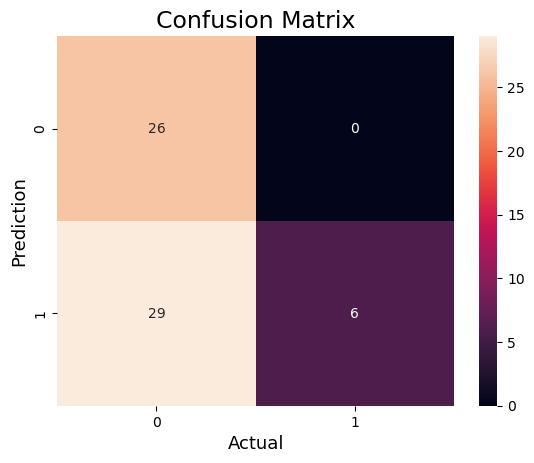

In [51]:
sns.heatmap(cm,
            annot=True,
            fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()


In [52]:
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)



0.5245901639344263


In [53]:
precision=precision_score(y_test,y_pred,average="macro")
print(precision)
# In out dataset traget variable has 10 categories '0 to 9'
# The precision and the recall has a paratemeter is "average = binary" this is default and 
#due to that if we not change precision and recall will generate the error
# To solve the problem in the precision and reacll we set the parameter is macro


0.7363636363636363


In [54]:
recall=recall_score(y_test,y_pred,average="macro")
print(recall)


0.5857142857142857


In [55]:
F1_score=f1_score(y_test,y_pred,average="macro")
print(F1_score)


0.4673291177356218
